<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy as sp
from scipy import signal
from datetime import timedelta, datetime

# Importing Data

## Importing Hourly Resolution Data

### Obtaining Longitudes and Latitudes from All Stations

We start by reading the first two lines of the data file to obtain the longitude and latitude information of the stations. We zip them together into a list of tuples, and add an element to the beginning of this list corresponding to the time.

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(longitudes, latitudes))
indices.insert(0, "time")

### Reading the Temperature Data

We now read in the temperature data, skipping the first two rows that contain the longitude and latitude information of the stations. The column names of the dataframe are the longitude and latitude tuples created above, and the index column is the timestamps.

In [4]:
df = pd.read_csv('AllStations_temperature_h_2017.dat', sep='\s+', skiprows=[0,1], names=indices, index_col = 'time')
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
time,,,,,,,,,,,,,,,,,,,,,
733408.0000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
733408.0417,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
733408.0833,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
733408.1250,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
733408.1667,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Changing the Datetimes into Appropriate Timestamps

The Datetimes used in this file are MATLAB datetimes. We use a function to convert each time in the time column to the appropriate timestamp and then change the index column into timestamps.

In [5]:
def matlab_to_python_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

df.index = [matlab_to_python_datetime(i) for i in df.index]
df.head()

,236.554,236.499,236.679,236.607,236.514,236.630,236.523,236.543,236.662,236.304,...,236.641,236.619,236.514,236.357,236.574,236.596,236.676,236.691,236.689,236.451
,48.5745,48.5376,48.4655,48.4608,48.4356,48.5273,48.4529,48.6804,48.4562,48.3891,...,48.4683,48.4744,48.4205,48.6568,48.4533,48.6529,48.4865,48.4623,48.4359,48.4572
2008-01-01 00:00:00.000000,3.25,1.43,4.21,4.62,3.45,4.44,2.72,3.97,4.68,5.12,...,4.29,4.10,3.01,NaN,4.00,4.81,4.58,NaN,4.87,4.07
2008-01-01 01:00:02.879995,3.06,1.38,4.28,4.77,3.46,4.21,2.64,4.15,4.61,4.95,...,4.41,4.30,2.87,NaN,4.15,4.60,4.44,NaN,4.85,4.05
2008-01-01 01:59:57.120005,1.90,1.18,4.12,4.70,3.46,4.07,2.64,4.18,4.62,5.11,...,4.24,4.23,2.97,NaN,4.06,4.65,4.47,NaN,4.91,4.02
2008-01-01 03:00:00.000000,1.69,0.98,4.20,4.77,3.65,3.67,2.81,4.27,4.71,5.33,...,4.36,4.30,3.10,NaN,4.12,4.75,4.53,NaN,4.97,4.06
2008-01-01 04:00:02.879995,2.09,0.93,4.61,4.99,3.90,3.55,3.11,4.29,4.93,5.56,...,4.58,4.53,3.37,NaN,4.25,4.97,4.68,NaN,5.17,4.27


### Finding the Required Station

These are the coordinates where we wish to measure the temperature. We look for the station nearest to this point.

In [6]:
station_lon = 236.691
station_lat =  48.462

In [7]:
lon_diff = abs(longitudes - station_lon)
lat_diff = abs(latitudes - station_lat)

station_num = list((lon_diff+lat_diff)).index(min(lon_diff+lat_diff))

station_num provides the column number of the data we wish to observe.

### Obtain Winter and Summer Data

In [8]:
df = df.iloc[:,station_num]

winter_start = pd.Timestamp(year=2015, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2016, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2016, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2016, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

# Part A

## Winter Data

Get the signal using scipy's welch method value. Here we use a hanning window with a 50% overlap.

In [30]:
NT = len(winter_data)
N = 2**8

x1 = winter_data.values - np.mean(winter_data.values)
f1, X1 = sp.signal.welch(x1, fs=1, window='hanning', nperseg=N, noverlap = N /2)

Get the uncertainties using the fact that 95%CI = $[S_{min}, S_{max}]$ where

$$S_{min} = \frac{nS(f)}{\chi^{-2}(1-\alpha/2, n)} \hspace{20mm} S_{max} = \frac{nS(f)}{\chi^{-2}(\alpha/2, n)}$$

Note that $\chi^{-2}$ is the inverse chi-squared distribution and $n$ is our degrees of freedom equal to times the number of windows used.

In [10]:
dof = 2*np.floor(NT/N)
a = 0.05 # 95% confidence

inter= sp.stats.chi2.interval(0.95, int(dof))
X1min = X1*dof/inter[1]; X1max = X1*dof/inter[0]

## Summer Data

In [31]:
NT = len(summer_data)
N = 2**8

x2 = summer_data.values - np.mean(summer_data.values)
f2, X2 = sp.signal.welch(x2, fs=1, window='hanning', nperseg=N, noverlap = N / 2)

In [12]:
dof = 2*np.floor(NT/N)
a = 0.05 # 95% confidence

inter= sp.stats.chi2.interval(0.95, int(dof))
X2min = X2*dof/inter[1]; X2max = X2*dof/inter[0]

### Plots

Below we plot the winter and summer power spectral densities.

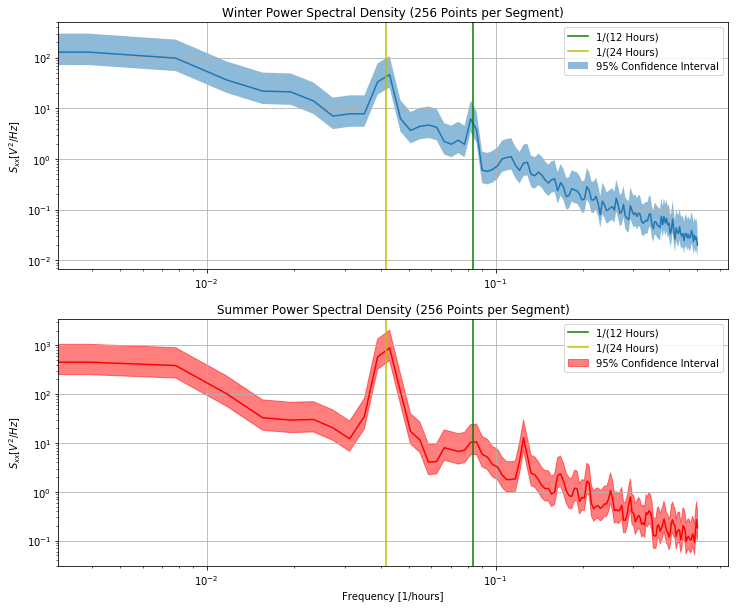

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12,10))
axes[0].loglog(f1,X1)
axes[0].set_title('Winter Power Spectral Density (256 Points per Segment)')
axes[0].set_ylabel('$S_{xx}[V^2/Hz]$')

axes[0].fill_between(f1, X1min, X1max, alpha=0.5, label='95% Confidence Interval') #Used for Uncertainties

axes[1].loglog(f2,X2,color='r')
axes[1].set_title('Summer Power Spectral Density (256 Points per Segment)')
axes[1].set_ylabel('$S_{xx}[V^2/Hz]$')

axes[1].fill_between(f2, X2min, X2max, alpha=0.5,
                     color='r', label='95% Confidence Interval') #Used for Uncertainties
axes[1].set_xlabel('Frequency [1/hours]')

axes[0].grid()
axes[1].grid()

axes[0].axvline(1/12, color='g', label='1/(12 Hours)')
axes[0].axvline(1/24, color='y', label='1/(24 Hours)')

axes[1].axvline(1/12, color='g', label='1/(12 Hours)')
axes[1].axvline(1/24, color='y', label='1/(24 Hours)')

axes[0].legend()
axes[1].legend()

plt.show()

# Part B

## Variance Preserving Form Plot

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


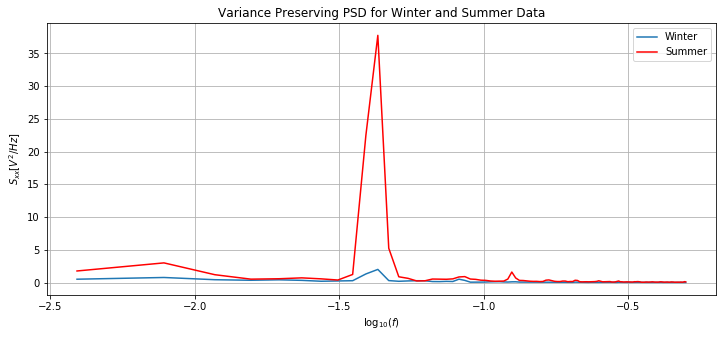

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(np.log10(f1),f1*X1, label='Winter')
ax.plot(np.log10(f2),f2*X2,color='r', label='Summer')

ax.set_title('Variance Preserving PSD for Winter and Summer Data')
ax.set_ylabel('$S_{xx}[V^2/Hz]$')
ax.set_xlabel('$\log_{10}(f)$')

ax.grid()
ax.legend()

plt.show()

## Test Parseval's Theorem for Each Data Set

Since $S_{xx}(f) \equiv \frac{1}{T}|X(f)|^2$, we need to check that

$$\int_{-\infty}^{\infty} |x(t)|^2 dt =T\int_{-\infty}^{\infty} S_{xx}(f) df $$

### Winter Data

In [33]:
LHS = np.trapz(x1**2, dx=1)
RHS = len(x1)*np.trapz(X1, f1)

print('The left hand side is {}'.format(LHS))
print('The right hand side is {}'.format(RHS/o))

The left hand side is 11619.3727658594
The right hand side is 11100.727435188195


### Summer Data

In [34]:
LHS = np.trapz(x2**2, dx=1)
RHS = len(x2)*np.trapz(X2, f2)

print('The left hand side is {}'.format(LHS))
print('The right hand side is {}'.format(RHS/o))

The left hand side is 32759.41039857137
The right hand side is 77207.7257435981


### Non-Equal Values?

The values appear to be quite different, but this is due to to the window used in the Welch method; hanning windows remove power from the power spectral density because the interval is often less than 1. 

If we use a boxcar window, however, and include all the data points, then Parseval's theorem works just fine:

In [17]:
NT = len(summer_data)
x_test = summer_data.values - np.mean(summer_data.values)
f_test, X_test = sp.signal.welch(x_test, fs=1, window='boxcar', nperseg=NT, noverlap = 0)

LHS = np.trapz(x_test**2, dx=1)
RHS = len(x_test)*np.trapz(X_test, f_test)

print('The left hand side is {}'.format(LHS))
print('The right hand side is {}'.format(RHS))

The left hand side is 32759.41039857137
The right hand side is 32761.977550005562


In [32]:
t = np.hanning(256)
o = sum(t**2)/256

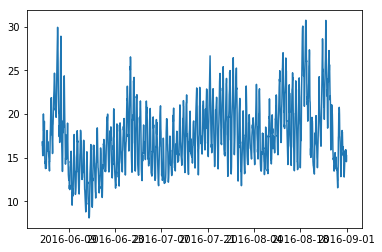

In [35]:
plt.plot(summer_data)